In [2]:
%load_ext autoreload
%autoreload 2
%tb

NameError: name 'nx' is not defined

In [ ]:
import networkx as nx
from graph2plan.dual.examples import kant_G1
from graph2plan.dcel.original import (
    create_embedding,
)
from graph2plan.helpers.auto_pos import draw_node_positioned_graph
from graph2plan.helpers.graph_checks import check_interior_faces_are_triangles, check_is_triangulated_chordal, check_is_biconnected, check_is_valid_triangulated, check_is_4_connected, check_has_no_seperating_triangle, check_is_k_connected
from copy import deepcopy
from graph2plan.dual.helpers import get_embedding_faces
from graph2plan.dual.create_rectangle import create_dual_and_calculate_domains
from graph2plan.dual.create_domains import calculate_domains, merge_domains
from graph2plan.dual.examples import (
    create_domains_for_kant,
    fully_embed_kant,
)


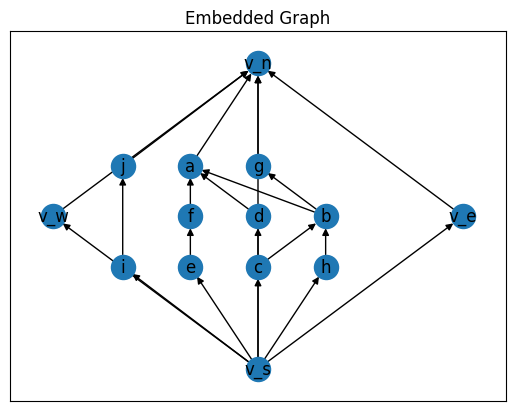

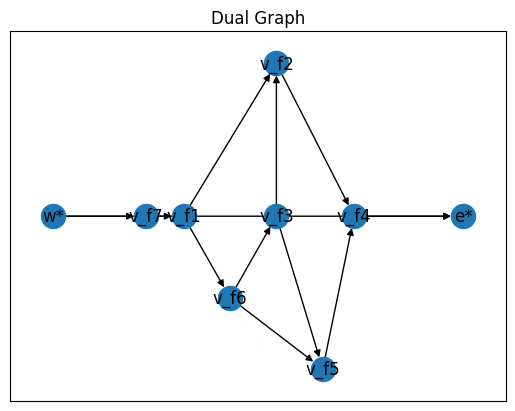

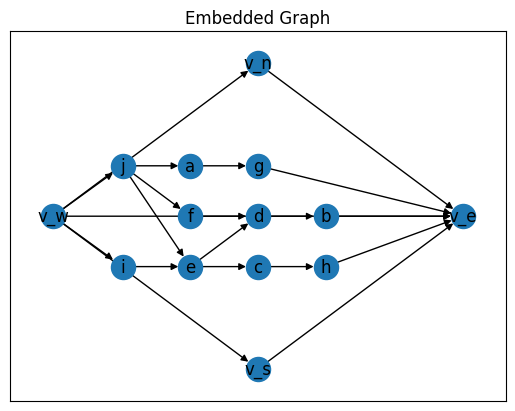

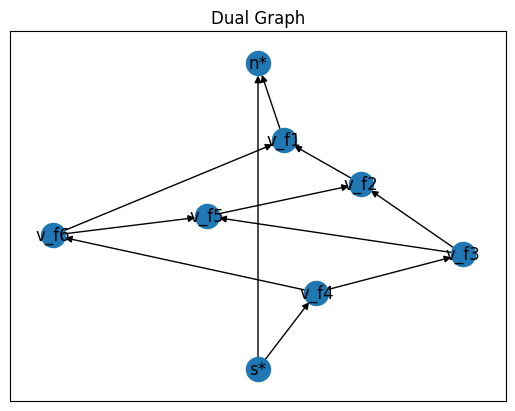

In [4]:
r1, r2 = fully_embed_kant()
draw=True
x_domains = create_dual_and_calculate_domains(r1, "y", draw)
y_domains = create_dual_and_calculate_domains(r2, "x", draw)

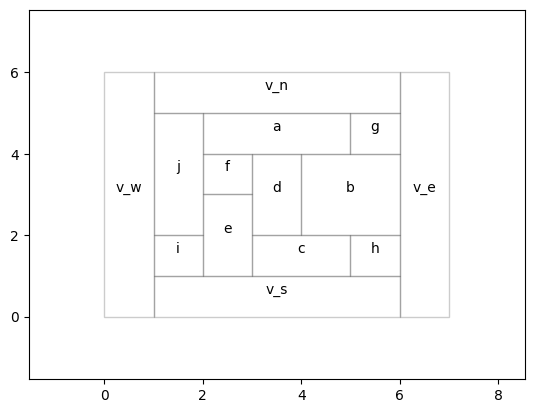

In [3]:
x_domains, y_domains = create_domains_for_kant()
doms = merge_domains(x_domains, y_domains)
doms.draw()

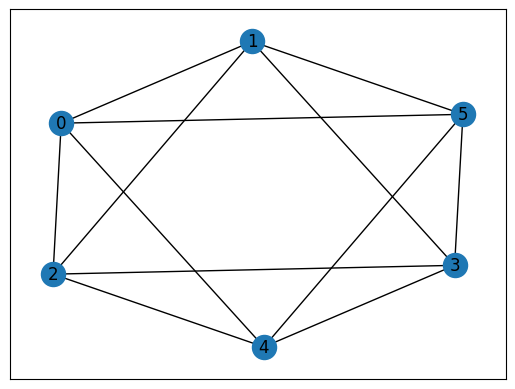

In [6]:
G1 = nx.random_regular_graph(4,6, seed=3)
nx.draw_networkx(G1)

In [5]:
check_is_k_connected(G1, 4)
nx.is_k_edge_connected(G1, 4)

True

In [6]:
b, pe = nx.check_planarity(G1)
assert b
pe

In [56]:
get_embedding_faces(pe)

{Face(vertices=[0, 1, 4]),
 Face(vertices=[0, 2, 1]),
 Face(vertices=[0, 4, 5]),
 Face(vertices=[0, 5, 2]),
 Face(vertices=[1, 2, 3]),
 Face(vertices=[1, 3, 4]),
 Face(vertices=[2, 5, 3]),
 Face(vertices=[3, 5, 4])}

In [17]:
# from networkx import check_planarity


c, C = nx.check_planarity(G1)
pos = nx.planar_layout(C)

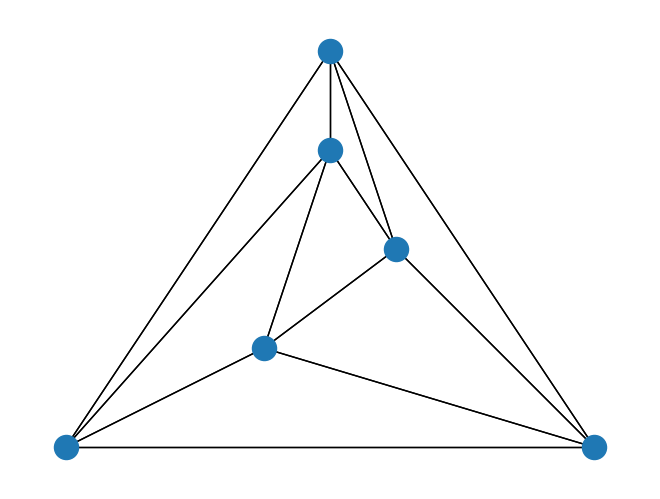

In [9]:
nx.draw_planar(C)

In [20]:
C.edges

OutEdgeView([(0, 2), (0, 4), (0, 3), (0, 1), (1, 2), (1, 3), (1, 5), (1, 0), (2, 4), (2, 0), (2, 5), (2, 1), (3, 1), (3, 5), (3, 0), (3, 4), (4, 3), (4, 0), (4, 5), (4, 2), (5, 2), (5, 4), (5, 1), (5, 3)])

In [18]:
pos

{0: array([-1.        , -0.41666667]),
 1: array([ 1.        , -0.41666667]),
 2: array([-0.25      , -0.16666667]),
 3: array([0.        , 0.58333333]),
 4: array([0.        , 0.33333333]),
 5: array([0.25      , 0.08333333])}

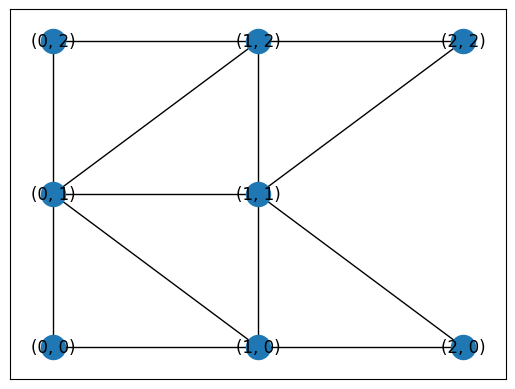

In [30]:
G, pos =  draw_node_positioned_graph(nx.triangular_lattice_graph(2, 3))

In [31]:
check_is_valid_triangulated(G, pos)

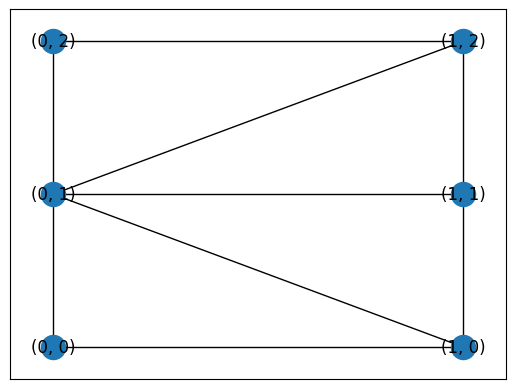

In [23]:
G, pos = draw_node_positioned_graph(nx.triangular_lattice_graph(2,2))

In [24]:
check_is_valid_triangulated(G, pos)

In [ ]:
embed = create_embedding(G, pos)


{Face(vertices=[(0, 0), (0, 1), (1, 0)]),
 Face(vertices=[(0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 1)]),
 Face(vertices=[(0, 1), (0, 2), (1, 2)]),
 Face(vertices=[(0, 1), (1, 2), (1, 1)]),
 Face(vertices=[(1, 0), (0, 1), (1, 1)])}

In [6]:
check_interior_faces_are_triangles(embed)

In [30]:
list(nx.k_edge_augmentation(G, 4))

[((0, 0), (2, 3)),
 ((0, 0), (2, 0)),
 ((0, 0), (0, 4)),
 ((0, 0), (2, 4)),
 ((0, 0), (2, 1)),
 ((0, 2), (0, 4))]

(<networkx.classes.graph.Graph at 0x10b6f2e00>,
 {(0, 0): (0, 0),
  (1, 0): (1, 0),
  (2, 0): (2, 0),
  (0, 1): (0, 1),
  (1, 1): (1, 1),
  (2, 1): (2, 1),
  (0, 2): (0, 2),
  (1, 2): (1, 2),
  (2, 2): (2, 2),
  (0, 3): (0, 3),
  (1, 3): (1, 3),
  (2, 3): (2, 3),
  (0, 4): (0, 4),
  (1, 4): (1, 4),
  (2, 4): (2, 4)})

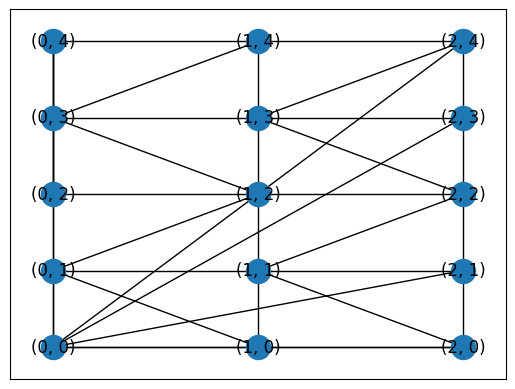

In [ ]:
# draw_node_positioned_graph(G1)

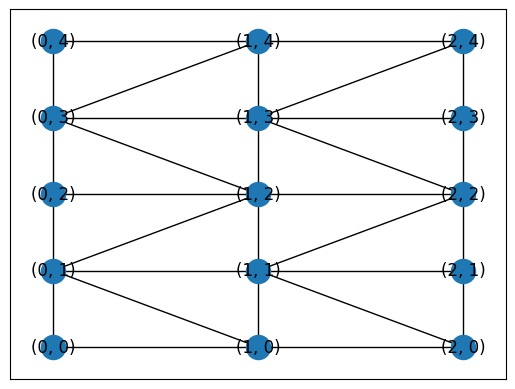

In [26]:
G, pos = draw_node_positioned_graph(nx.triangular_lattice_graph(4,4))

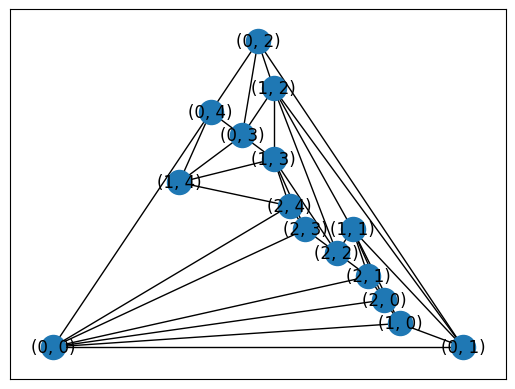

In [27]:

G1 = deepcopy(G)
G1.add_edges_from(nx.k_edge_augmentation(G, 4))

pos_planar = nx.planar_layout(G1)
nx.draw_networkx(G1, pos_planar)

In [29]:
check_has_no_seperating_triangle(G1)

Improper4TPGraphError: There are seperating triangles 
 20 three cycles ?= 22, where m=36, n=15

In [15]:
embed = create_embedding(G1,pos_planar)
embed

In [16]:
check_interior_faces_are_triangles(embed)

Exception: Not all interior faces are triangular! Non-triangular faces: {Face(vertices=[(0, 0), (2, 3), (2, 2), (2, 1)]), Face(vertices=[(0, 0), (0, 4), (1, 4), (2, 4)])}

In [44]:
check_is_valid_triangulated(G)

Triangulated, but not chordal.. 


In [43]:
check_is_4_connected(G1)

In [27]:
nx.degree(G)

DegreeView({(0, 0): 2, (1, 0): 4, (2, 0): 3, (0, 1): 5, (1, 1): 6, (2, 1): 3, (0, 2): 3, (1, 2): 6, (2, 2): 5, (0, 3): 5, (1, 3): 6, (2, 3): 3, (0, 4): 2, (1, 4): 4, (2, 4): 3})

In [ ]:
degrees = list(nx.degree(G))
for deg in degrees:
    if deg[1] < 4:
        raise Exception(f"Node has less than 4 neighbors: {deg}")

((0, 0), 2)


Exception: Node has less than 4 neighbors: ((0, 0), 2)

In [11]:
check_is_valid_triangulated(G)
# check_is_4_connected(G)

In [10]:
check_has_no_seperating_triangle(G)

In [ ]:
check_is_biconnected(G)
check_interior_faces_are_triangles(G)
check_is_triangulated_chordal(G)

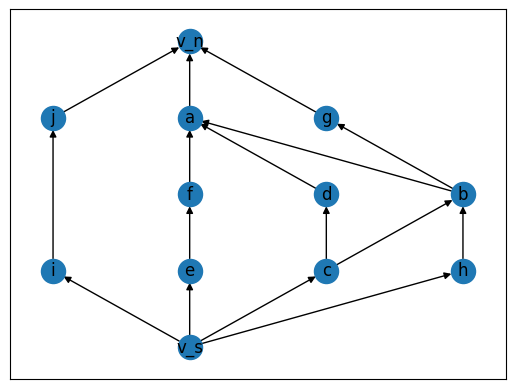

In [18]:
G, pos = kant_G1()
nx.draw_networkx(G,pos)

In [ ]:
check_is_biconnected(G.to_undirected())
check_interior_faces_are_triangles(G.to_undirected())
check_is_triangulated_chordal(G.to_undirected())

NotTriangulatedError: 